In [11]:
#Clustering you don’t know what you are looking for, and you are trying to identify 
#some segments or clusters in your data.

In [10]:
#we will create a DV which will take finite number of values within clusters
#and each of the values will be class of the DV we create


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [23]:
dataset=pd.read_csv('Mall_Customers.csv')
x = dataset.iloc[:,[3,4]].values   # matrix of features/ we 'll include all the columns and not skip last one as we 
#have the dependent variable vector included in dataset as we 've to find the clusters and not predict it

#since we have to plot a 2 d plot, therefore we choose annual income and spending score to find cluster and represent
#in 2d

#y = dataset.iloc[:,-1].values    # dependent variable vector is not needed here 

In [24]:
#We will also not split the dataset into training and test set as we do not have a DV


# Using Elbow method to find optimal number of clusters

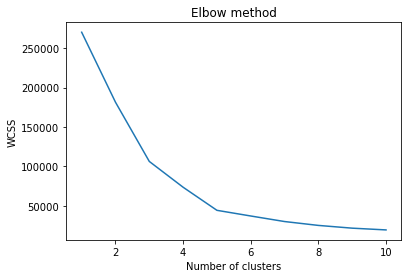

In [37]:
from sklearn.cluster import KMeans
#we will use for loop which will run the kmeans algorithm with different number of clusters
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init ='k-means++', random_state=42) #ex: Kmeans object i=3 identifies 3 clusters....
    #init='k-means++' helps to avoid random initialization trap
    #random_state=42 to get same result
    kmeans.fit(x)
    #We will now use the fit method to train the kmeans algorithm
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)    #we input no of values we have taken on x-axis
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Training the kmeans model on dataset

In [42]:
#We will train and run the kmeans algorithm on 5 clusters(as elbow is on 5)
kmeans = KMeans(n_clusters=5, init ='k-means++', random_state=42) 
y_pred = kmeans.fit_predict(x)

#We will build dependent variable whose value are exactly from 1 to 5 
# 1 will be cluster 1, 2 will be cluster 2, 3 will be cluster 3....

#fit_predict method not only trains the kmeans model on dataset but it also returns exactly that dependent variable
#Which we are about to create


In [43]:
print(y_pred) #shows all the different clusters to which each customer belongs
#Number of the clusters start from 0
#here clusters are 0,1,2,3,4

#Customer with id=1 belongs to fourth cluster
#Customer with id=1 belongs to first cluster


[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 1 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 1 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


# Visualising the Clusters

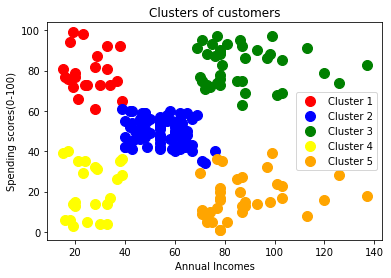

In [44]:
plt.scatter(x[y_pred==0, 0], x[y_pred==0, 1], s=100, c='red', label="Cluster 1")
plt.scatter(x[y_pred==1, 0], x[y_pred==1, 1], s=100, c='blue', label="Cluster 2")
plt.scatter(x[y_pred==2, 0], x[y_pred==2, 1], s=100, c='green', label="Cluster 3")
plt.scatter(x[y_pred==3, 0], x[y_pred==3, 1], s=100, c='yellow', label="Cluster 4")
plt.scatter(x[y_pred==4, 0], x[y_pred==4, 1], s=100, c='orange', label="Cluster 5")
plt.title('Clusters of customers')
plt.xlabel('Annual Incomes')
plt.ylabel('Spending scores(0-100)')
plt.legend()
plt.show()